**Processamento de Imagens**

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Q1**
A Entropia de um array é dada por
$
H = - \sum_{i=0}^{L} p_{i} \log p_{i}
$
onde
$
p_{i} = \dfrac{n_{i}}{n}
$
e $n_{i}$ é a quantidade de pixels que possuem intensidade $i$, $i=0,\ldots,L$ e $n$ é o número total de pixels na imagem. O logaritmo é na base 2.
1. Calcule as entropias das 1magens `q2a1png` e `q2b.png` utilizando **exclusivamente** `numpy`.
1. Compare os dois resultados e explique o que pode justificar a diferença entre eles.lt

In [13]:
img1 = cv2.imread("./img/q1a.png")
img2 = cv2.imread("./img/q1b.png")

In [14]:
def calc_entropy(img) -> np.ndarray:
    if len(img.shape) == 3 and img.shape[2] == 3:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        img_gray = img
    
    ni, _ = np.histogram(img_gray.flatten(), bins = range(0, 256))
    prob = ni/np.sum(ni)

    return -np.sum(prob * np.log2(prob, where=(prob>0)))

In [15]:
print(f"q1a: ", calc_entropy(img1))
print(f"q1b: ", calc_entropy(img2))

q1a:  1.0
q1b:  1.0


**Q2** Aplique uma transformação que melhore a visualização da imagem `aerial.tif`.

In [21]:
img = cv2.imread("./img/aerial.tif", cv2.COLOR_BGR2GRAY)

In [75]:
def transformation (img):
    img = img/255
    result = 1 * np.power(img, 3.5)
    result *=255
    result = result.astype(np.uint8)

    return result

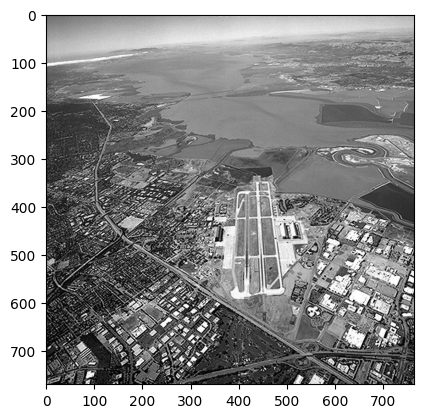

In [76]:
plt.imshow(transformation(img), cmap='gray')

**Q3** A imagem $512\times 512$ ```radial.png``` contém 10 ciclos de uma senoide dispostos radialmente. Desenvolva o código que gera uma imagem similar utilizando apenas funções disponíveis no ```numpy```.

In [81]:
def generate_radial():
    size = 512
    frequency = 10  # número de ciclos da senoide

    # Criação de coordenadas x e y centradas
    x = np.linspace(-np.pi, np.pi, size)
    y = np.linspace(-np.pi, np.pi, size)
    X, Y = np.meshgrid(x, y)

    # Coordenadas polares (ângulo)
    theta = np.arctan2(Y, X)  # ângulo em radianos [-π, π]

    # Geração da imagem radial com senoide
    image = np.sin(frequency * theta)

    # Normalização para [0, 255]
    image_normalized = ((image + 1) / 2 * 255).astype(np.uint8)

    # Exibir a imagem
    plt.imshow(image_normalized, cmap='gray')
    plt.axis('off')
    plt.title('Imagem radial com 10 ciclos de senoide')
    plt.show()

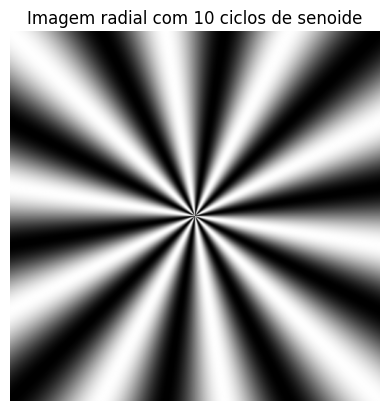

In [82]:
generate_radial()

**Q4** Aprimore o foco da imagem ```moon.tif``` _sem utilizar derivadas_ de forma que o seu resultado se aproxime da imagem ```moon_focused.png```.

In [123]:
img = cv2.imread("./img/moon.tif")
goal = cv2.imread("./img/moon_focused.png")

In [119]:
def better_focus(img, kernel_size = (5,5), sigma=1.0, amount = 1.0, threshold = 0):
    if img.dtype != np.float32:
        img = img.astype(np.float32) / 255.0

    blurred = cv2.GaussianBlur(img, kernel_size, 1.0)

    mask = img - blurred

    if threshold > 0:
        mask = np.where(np.abs(mask) >= threshold, mask, 0)

    sharpened = img + amount * mask


    if img.dtype == np.uint8:
        sharpened = (sharpened * 255).astype(np.uint8)

    return sharpened

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1407249..1.1577864].


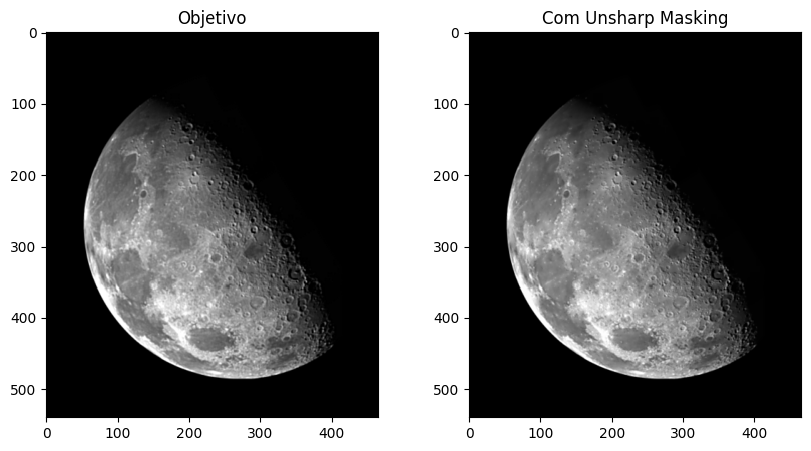

In [128]:
result = better_focus(img, kernel_size=(5,5), sigma=1.0, amount=2, threshold=0.01)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(goal), plt.title('Objetivo')
plt.subplot(122), plt.imshow(result), plt.title('Com Unsharp Masking')
plt.show()